# Session 3 Exercises

In [2]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(pROC)        # AUC, ROC
library(e1071)       # Evaluation
library(gridExtra)   # Visualization
library(kknn)        # kNN model
library(nnet)        # One-vs-All Logistic Regression
library(dummies)     # Data processing

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)


Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:mlr':

    train


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var



Attaching package: 'e1071'


The following object is masked from 'package:mlr':

    impute



Attaching package: 'kknn'


The following object is masked from 'package:caret':

    contr.dummy


dummies-1.5.6 provided by Decision Patterns




## Question-1 

## Review K-Fold Cross validation

## (a)

 K-fold Cross validation is implemented by taking n observations at random and splitting them into k non-overlapping groups of approximately n/k.

## (b)

i. 
Advantages:Reduced bias and variance of the resulting estimate is reduced as k increases
Disadvantages:The training algorithm has to be re-run from scratch k no of times

<br> ii.
Advantages:K-fold CV gives more accurate estimates of the test error rate 
Disadvantages:As we use entire datset for training,So it has Less bias when compared K-fold CV


## Question-2

## Solution : (a)

In [3]:
#Generate a simulated data
set.seed(1)
y=rnorm(100)
x=rnorm(100)
y=x-2*x^2+rnorm (100)

n=100 and p=2.the model used to generate the data in equation form: y = x - 2*x^2 + ε(eps)

## Solution : (b)

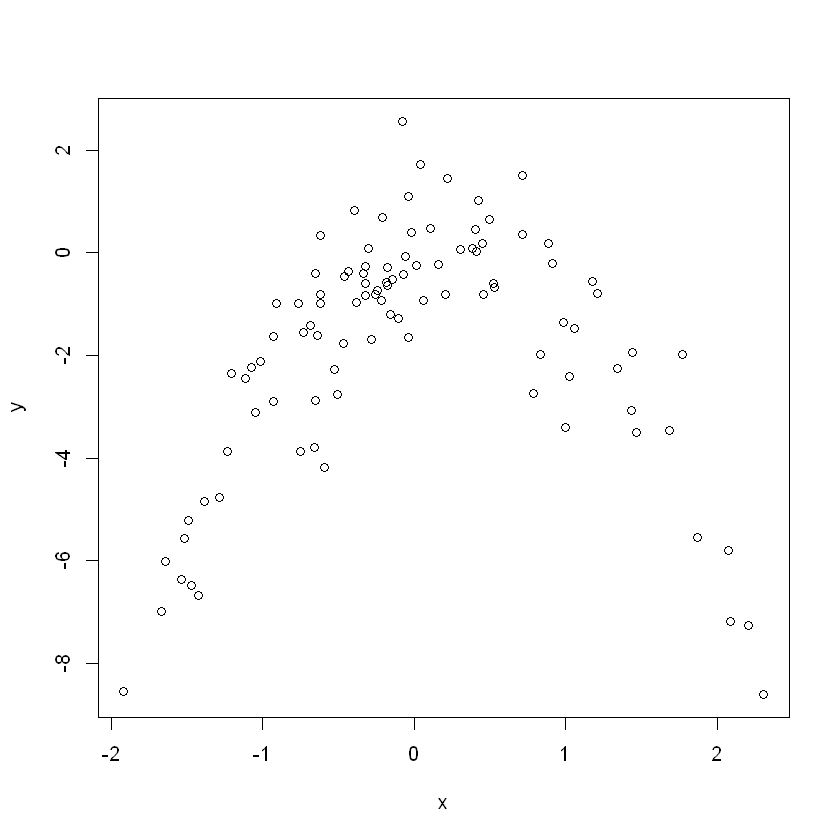

In [4]:
#Scatterplot of X against Y
plot(x,y)

From the above graph,we can see that there is a quadratic relationship between x and y

## Solution : (c)

 i. Y=β0+β1X+ε

In [5]:
library(boot)
set.seed(10)
df <- data.frame(x, y)
fit.glm.1 <- glm(y ~ x)
cv.glm(df, fit.glm.1)$delta[1]


Attaching package: 'boot'


The following object is masked from 'package:lattice':

    melanoma




[1] 5.890979

ii. Y=β0+β1X+β2X2+ε

In [6]:
fit.glm.2 <- glm(y ~ poly(x, 2))
cv.glm(df, fit.glm.2)$delta[1]

[1] 1.086596

iii. Y=β0+β1X+β2X2+β3X3+

In [7]:
fit.glm.3 <- glm(y ~ poly(x, 3))
cv.glm(df, fit.glm.3)$delta[1]

[1] 1.102585

iv. Y=β0+β1X+β2X2+β3X3+β4X4+ε

In [8]:
fit.glm.4 <- glm(y ~ poly(x, 4))
cv.glm(df, fit.glm.4)$delta[1]

[1] 1.114772

## Solution : (d)

In [9]:
set.seed(123)
df <- data.frame(x, y)
fit.glm.1 <- glm(y ~ x)
cv.glm(df, fit.glm.1)$delta[1]

[1] 5.890979

In [10]:
fit.glm.2 <- glm(y ~ poly(x, 2))
cv.glm(df, fit.glm.2)$delta[1]

[1] 1.086596

In [11]:
fit.glm.3 <- glm(y ~ poly(x, 3))
cv.glm(df, fit.glm.3)$delta[1]

[1] 1.102585

In [12]:
fit.glm.4 <- glm(y ~ poly(x, 4))
cv.glm(df, fit.glm.4)$delta[1]

[1] 1.114772

Both (c) and (d) are similar because LOOCV evaluates for one observation in this case

## Solution : (e)

The cross-validation error is minimum (say 1.0865955642745 ) for the quadratic function Y=β0+β1X+β2X2+error.It is minimum because we clearly saw that there is  quadratic relationship between x and y.

## Solution : (f)

In [13]:
#statistical significance of the coefficient estimates
summary(fit.glm.4)


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8914  -0.5244   0.0749   0.5932   2.7796  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.8277     0.1041 -17.549   <2e-16 ***
poly(x, 4)1   2.3164     1.0415   2.224   0.0285 *  
poly(x, 4)2 -21.0586     1.0415 -20.220   <2e-16 ***
poly(x, 4)3  -0.3048     1.0415  -0.293   0.7704    
poly(x, 4)4  -0.4926     1.0415  -0.473   0.6373    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1.084654)

    Null deviance: 552.21  on 99  degrees of freedom
Residual deviance: 103.04  on 95  degrees of freedom
AIC: 298.78

Number of Fisher Scoring iterations: 2


The p-values suggests that the linear and quadratic variables are statistically significant and that the 3rd and 4th degree terms are not statistically significant.It further matches with quadratic equation where we get the lowest LOOCV error  

## Question-3

## Solution (a)

The model with best subset selection has the smallest training RSS(Residual sum of squares) because it considers every posible model with K predictors and best subset selection values can't deviate much from expected values thereby leading to low variance  

## Solution (b)

The model with best subset selection - k predictors has the smallest test RSSit beacuse it can take into account more models when compared to the other models.

## Solution (c)

i.TRUE
ii.TRUE
iii.FALSE
iv.FALSE
v.FALSE

## Question-4

## (a)

In [14]:
library(ISLR)
attach(College)

In [15]:
# Train test spliting
set.seed(123)
train_set <- createDataPartition(College$Apps, p = 0.7, list = FALSE)
train <- College[train_set,]
test <- College[-train_set,]
train

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52
Alfred University,Yes,1732,1425,472,37,75,1830,110,16548,5406,500,600,82,88,11.3,31,10932,73
Allegheny College,Yes,2652,1900,484,44,77,1707,44,17080,4440,400,600,73,91,9.9,41,11711,76
Alma College,Yes,1267,1080,385,44,73,1306,28,12572,4552,400,400,79,87,15.3,32,9305,68
Alverno College,Yes,494,313,157,23,46,1317,1235,8352,3640,650,2449,36,69,11.1,26,8127,55


## (b)

In [16]:
#Fit a linear model using least squares on the training set
lm.fit <-  lm(Apps ~ . , data = train)
lm.pred <-  predict(lm.fit, test)
test_info <- postResample(lm.pred, test$Apps) #Calculates performance across resamples #REF: https://www.rdocumentation.org/packages/caret/versions/3.21/topics/postResample
test_info

RMSE     Rsquared          MAE 
1371.8869605    0.9424937  645.0297819

## (c)

In [17]:
# Fit a ridge regression model on the training set
library(glmnet)
train.matrix <-  model.matrix(Apps ~ . -1 , data = train)
test.matrix <-  model.matrix(Apps ~ . -1, data = test)
grid <-  10 ^ seq(4, -2, length = 100)
ridge <-  cv.glmnet(train.matrix, train[, "Apps"], 
                        alpha = 0, lambda = grid, thresh = 1e-12)
lambda.val <-  ridge$lambda.min
lambda.val

Loading required package: Matrix

Loaded glmnet 4.1-2



[1] 21.54435

In [18]:
ridge_pred <-  predict(ridge, newx = test.matrix, s = lambda.val)
mean((test[, "Apps"] - ridge_pred)^2)

[1] 2036598

## (d)

In [19]:
# Fit a lasso model on the training set
lasso <-  cv.glmnet(train.matrix, train[, "Apps"], 
                        alpha = 1, lambda = grid, thresh = 1e-12)
lambda.val <-  lasso$lambda.min
lambda.val

[1] 6.135907

In [20]:
lasso_pred <-  predict(lasso, newx = test.matrix, s = lambda.val)
mean((test[, "Apps"] - lasso_pred)^2)

[1] 1943359

## (e)

In [21]:
# Fit a PCR model on the training set
library(pls)
set.seed(1)
pcr.fit=pcr(Apps~., data=train, scale=TRUE, validation="CV")



Attaching package: 'pls'


The following object is masked from 'package:caret':

    R2


The following object is masked from 'package:mlr':

    crossval


The following object is masked from 'package:stats':

    loadings




In [22]:
summary(pcr.fit)

Data: 	X dimension: 545 17 
	Y dimension: 545 1
Fit method: svdpc
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            3389     3376     1660     1659     1449     1279     1277
adjCV         3389     3376     1658     1657     1422     1266     1271
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1254     1234     1177      1175      1170      1170      1171
adjCV     1258     1220     1175      1173      1168      1167      1168
       14 comps  15 comps  16 comps  17 comps
CV         1168      1164      1003     995.0
adjCV      1166      1162      1000     992.2

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X      31.892    57.49    64.60    70.26    75.69    80.70    84.36    87.81
Apps    1.358    76.76    76.85    84.55    87.14    87.14    87.28    88.4

Choosing M = 16.Since it has low CV error value

In [23]:
pcr_pred=predict(pcr.fit,test,ncomp=16)
mean((test$Apps-pcr_pred)^2) #test error

[1] 2086798

## (f)

In [24]:
#  Fit a PLS model on the training set
set.seed(1)
pls.fit = plsr(Apps~., data=train, scale=TRUE,validation="CV")
summary(pls.fit) #determine M value

Data: 	X dimension: 545 17 
	Y dimension: 545 1
Fit method: kernelpls
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            3389     1500     1214     1133     1116     1036     1017
adjCV         3389     1497     1214     1131     1110     1033     1014
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV      1001.8    998.9    997.9     997.8     995.8     994.9     994.9
adjCV    998.8    996.1    995.0     994.8     992.9     992.1     992.2
       14 comps  15 comps  16 comps  17 comps
CV        994.9     995.1     994.9     995.0
adjCV     992.2     992.3     992.2     992.2

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       25.63    38.41    62.86    66.01    69.22    73.83    76.90    81.19
Apps    81.30    87.78    89.41    90.52    91.58    92.03    92.14    

Choosing M = 12.Since it has low CV error value

In [25]:
pls_pred = predict(pls.fit, test, ncomp = 12)
mean((pls_pred - test$Apps)^2)

[1] 1897756

## (g)

Yes there is a slight difference among the test errors resulting from these five approaches.PLS model is the best one wth less test error value(say 0.126).To say how accurately we can predict the number of applications received, let’s compute the PLS model R-square value.

In [26]:
TSS = sum((mean(test$Apps) - test$Apps)^2)
RSS = sum((pls_pred - test$Apps)^2)
1 - (RSS)/(TSS)

[1] 0.9180117

The R-squared for my best model (Partial least squares) can explain 91.8% of the variance in Apps using this model

## QUestion -5

## (a)

In [27]:
# Load ISLR Library #REF:http://rstudio-pubs-static.s3.amazonaws.com/392778_2c85eb882da9411aae9a0a82b77b4157.html
library(ISLR)
library(MASS) 
library(splines)
library(boot)
#load the data
attach(Boston)
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [28]:
# fit the data
cubic_fit <- lm(nox ~ poly(dis, 3), data = Boston)
coef(summary(cubic_fit))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.5546951,0.00275939,201.020894,0.000000e+00
"poly(dis, 3)1",-2.0030959,0.06207094,-32.271071,1.597201e-124
"poly(dis, 3)2",0.8563300,0.06207094,13.795987,6.133104e-37
"poly(dis, 3)3",-0.3180490,0.06207094,-5.123959,4.274950e-07


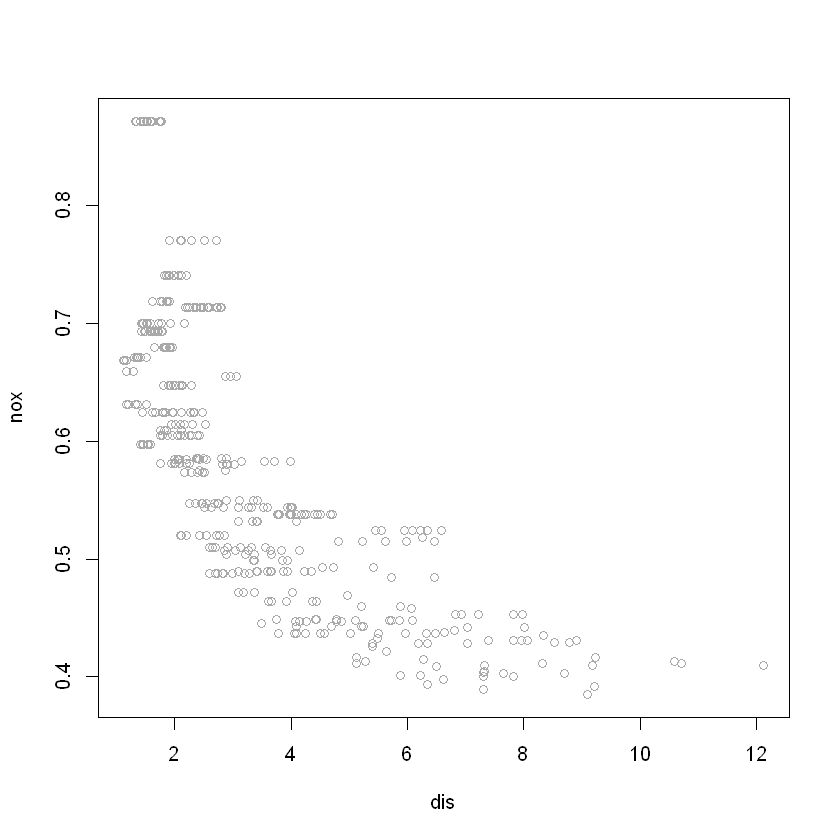

In [29]:
#plot the resulting data
dis.grid <- seq(min(Boston$dis), max(Boston$dis), by = 0.1)
preds <- predict(cubic_fit, list(dis = dis.grid), se = TRUE)
se.bands <- cbind(preds$cubic_fit + 2* preds$se.cubic_fit, preds$cubic_fit - 2 * preds$se.cubic_fit)
plot(nox ~ dis, data = Boston, col = "darkgrey")



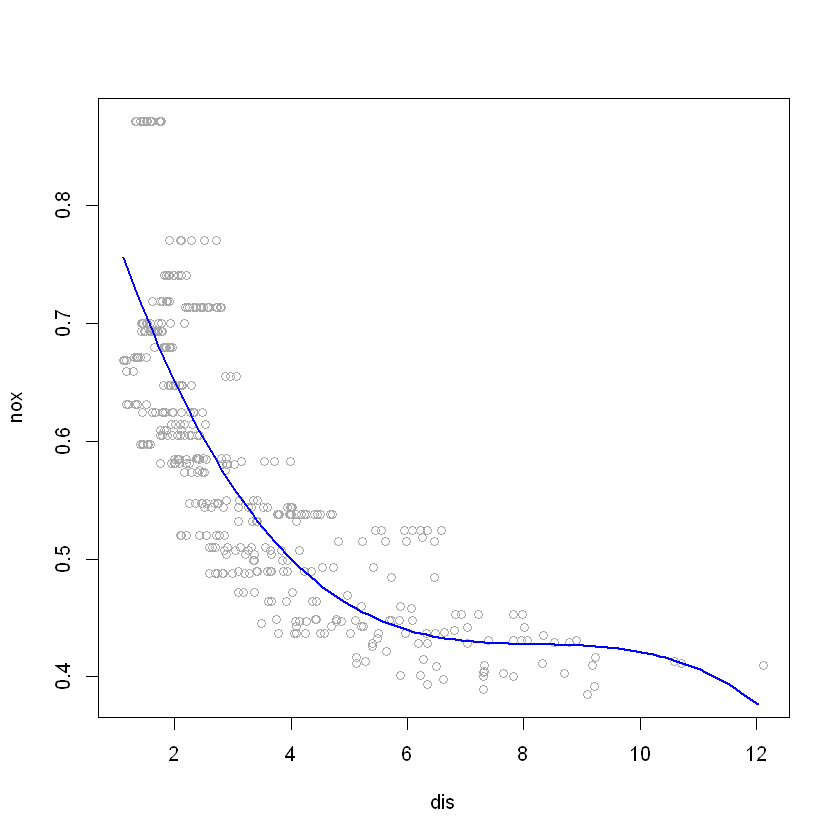

In [30]:
#plot the polynomial fit 
preds <- predict(cubic_fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, preds, col = "blue", lwd = 2)

## (b)

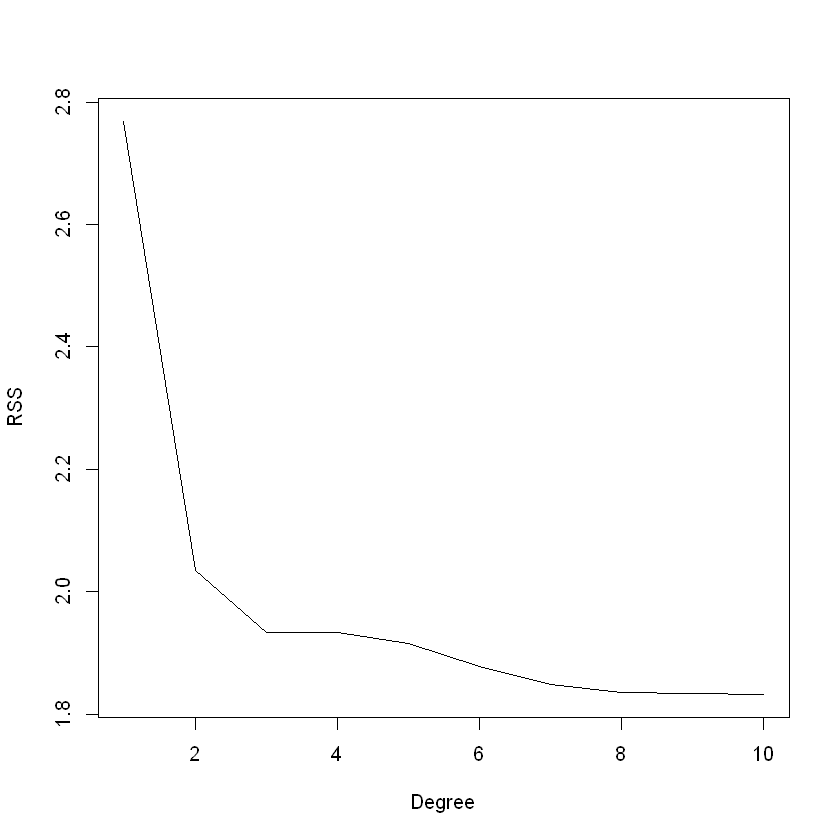

In [31]:
#Plot the polynomial fits for a range of different polynomial degrees
RSS <- rep(NA, 10)
for (i in 1:10) {
  fit <- lm(nox ~ poly(dis, i), data = Boston)
  RSS[i] <- sum(fit$residuals ^ 2)
}
plot(1:10, RSS, type = 'l', xlab = "Degree", ylab = "RSS")

The Residual sum of squares gradually decreases with increase in degree of polynomials

## (c)

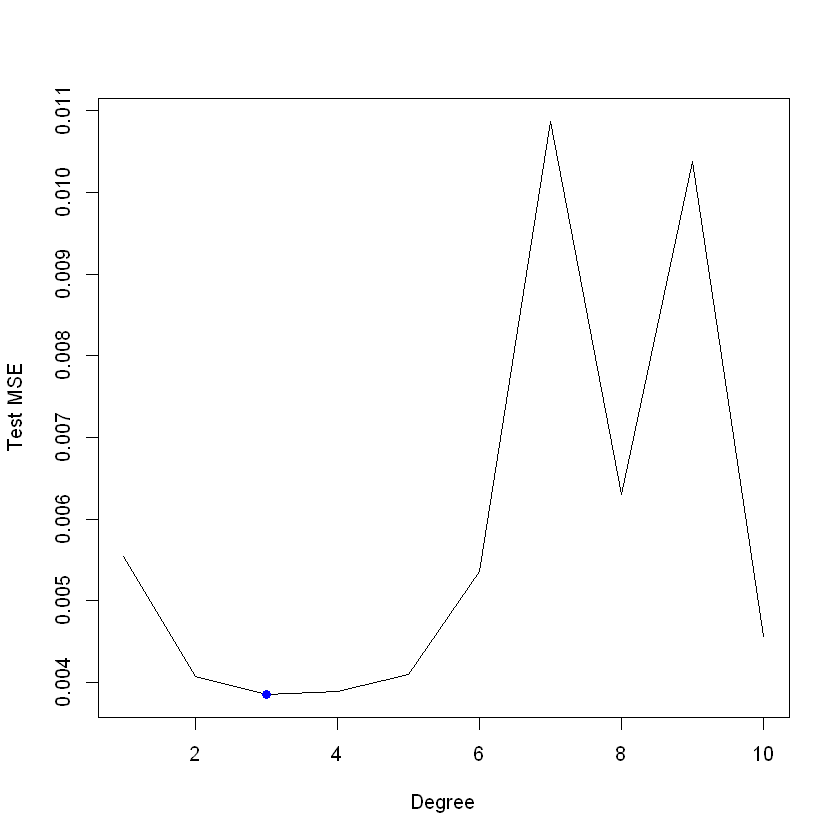

In [32]:
#Perform cross-validation or another approach to select the optimal degree for the polynomial
testMSE <- rep(NA, 10)
for (i in 1:10) {
  fit <- glm(nox ~ poly(dis, i), data = Boston)
  testMSE[i] <- cv.glm(Boston, fit, K = 10)$delta[1]
}
plot(1:10, testMSE, type = 'l', xlab = "Degree", ylab = "Test MSE")
points(which.min(testMSE), testMSE[which.min(testMSE)], col = 'blue', pch = 19)

From the above plot,we can conclude that the optimal polynomial degree is 3

## (d)

In [33]:
#Use the bs() function to fit a regression spline
dof <- 4
fit <- lm(nox ~ bs(dis, df = dof), data = Boston)
attr(bs(Boston$dis, df = dof), "knots")

50% 
3.20745

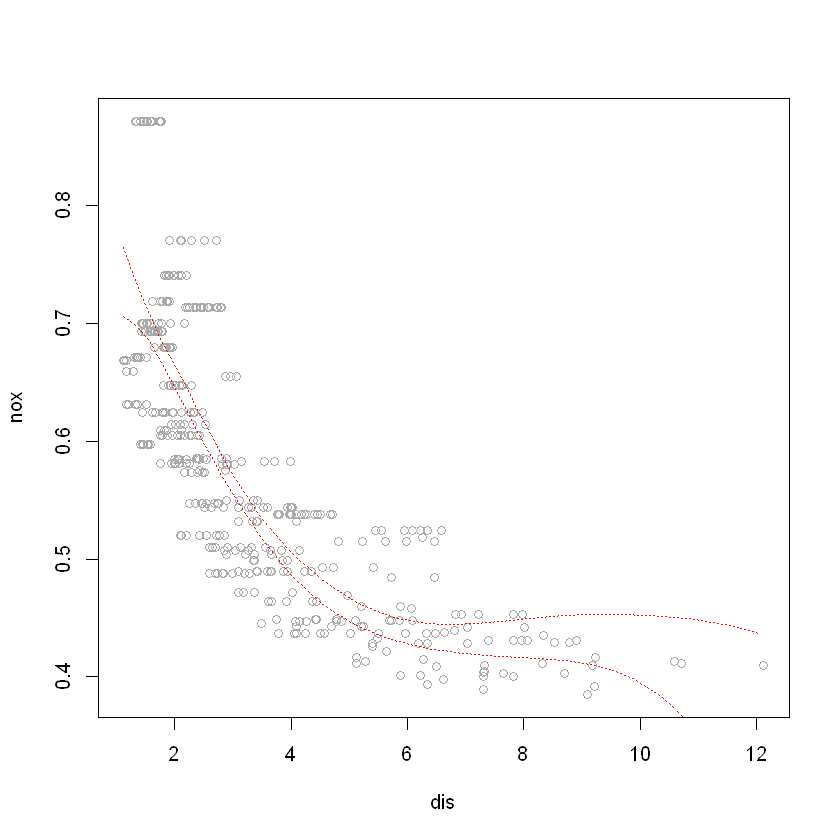

In [34]:
#plot
preds <- predict(fit, list(dis = dis.grid), se = TRUE)
se.bands <- cbind(preds$fit + 2* preds$se.fit, preds$fit - 2 * preds$se.fit)
plot(nox ~ dis, data = Boston, col = "darkgrey")
matlines(dis.grid, se.bands, lwd = 1, col = "red", lty = 3)

degree of freedom (dof) is equal to the sum of the number of knots and degree.So 4(dof) = 3(default degree) + 1(No of knots),So the number of knot is 1

## (e)

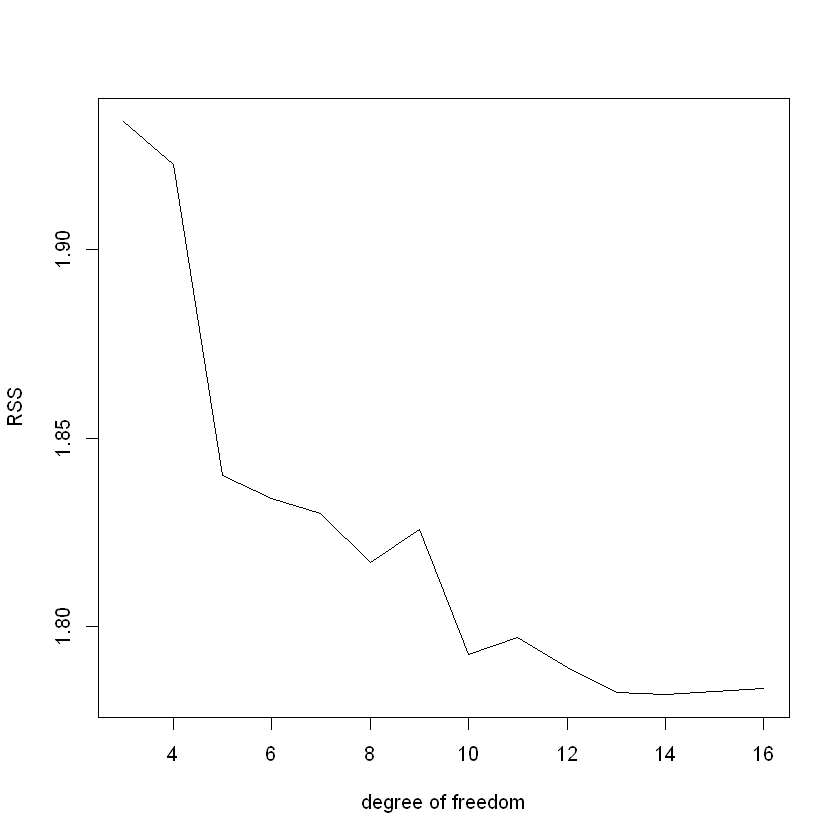

In [35]:
#fit a regreg_splsion spline for a range of degrees of freedom
reg_spl <- c()
df.range <- 3:16
for (dof in df.range) {
  fit <- lm(nox ~ bs(dis, df = dof), data = Boston)
  reg_spl <- c(reg_spl, sum(fit$residuals ^ 2))
}
plot(df.range, reg_spl, type = 'l', xlab = 'degree of freedom', ylab = 'RSS')

From the above plot we can observe that dof = 10 is better as it has comparatively less RSS

## (f)

In [36]:
#Cross validation

res <- c()
for (dof in df.range) {
  fit <- glm(nox ~ bs(dis, df = dof), data = Boston)
  testMSE <- cv.glm(Boston, fit, K = 10)$delta[1]
  res <- c(res, testMSE)
}


Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.2157), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.2157), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(di

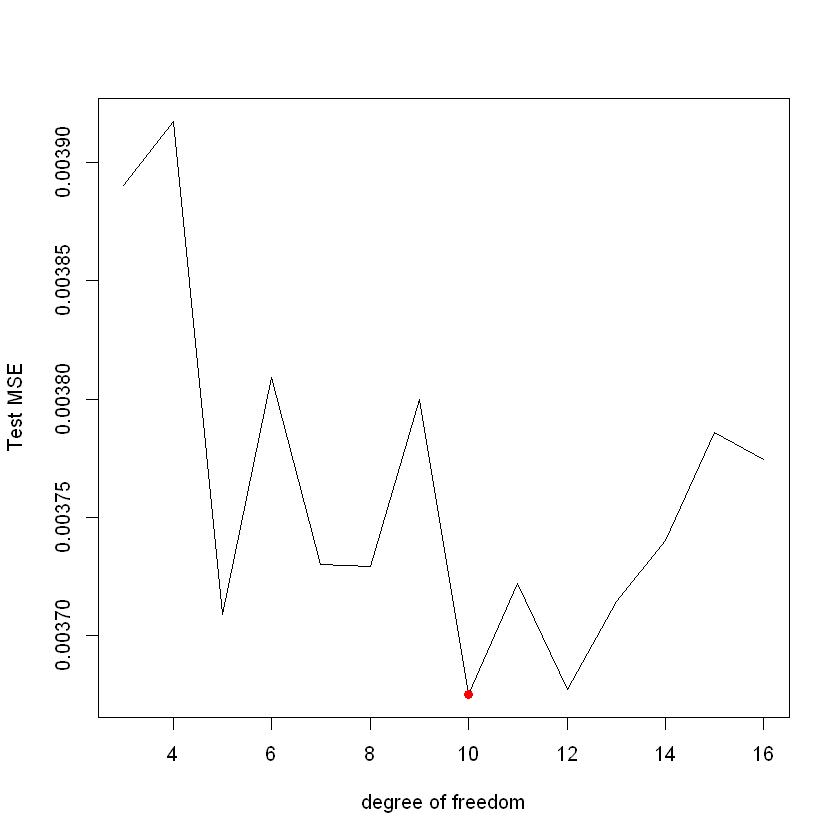

In [37]:
#plot
plot(df.range, res, type = 'l', xlab = 'degree of freedom', ylab = 'Test MSE')
points(which.min(res) + 2, res[which.min(res)], col = 'red', pch = 19)

Based on the above plot,Dof = 10 is chosen